#### Import libraries and packages

In [4]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns

#### Set connection with postgres database

In [5]:
host = 'postgresfib.fib.upc.edu'
dbname = 'ADSDBjordi.cluet'
user = 'jordi.cluet'
pwd = 'DB151199'
port = 6433
sslmode = 'require'

conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, user, pwd))
cursor = conn.cursor()

#### Select whole table as dataframe

In [6]:
sql = "SELECT * from formatted_zone.zenodo_fotocasa_2020_21_12_06;"
df = pd.read_sql_query(sql, conn)
df.head()

,id,address,bathrooms,building_subtype,building_type,conservation_state,extraction_date,discount,floor_elevator,is_new_construction,link,price,real_estate,real_estate_id,rooms,sq_meters,neighbourhood,neighbourhood_mean_price
0,0,"Carrer Roger de Lluria, Dreta de l'Eixample",3,Flat,Flat,0,2020-10-28,0,1,False,/es/alquiler/vivienda/barcelona-capital/calefa...,5000.0,SOMOS REAL ESTATE SERVICES,9202765680731,3,208.0,la dreta de l'eixample,1307.616842
1,1,Sant Antoni,1,Flat,Flat,1,2020-10-28,0,1,False,/es/alquiler/vivienda/barcelona-capital/aire-a...,1250.0,TECNOCASA RIERA ALTA MAR,9202751363773,3,93.0,sant antoni,994.909158
2,2,"Carrer Valencia, La Nova Esquerra de l'Eixample",2,Flat,Flat,0,2020-10-28,0,1,False,/es/alquiler/vivienda/barcelona-capital/calefa...,1600.0,SOMOS REAL ESTATE SERVICES,9202765680731,4,129.0,la nova esquerra de l'eixample,1053.832393
3,3,"Carrer Muntaner, Sant Gervasi- Galvany",2,Flat,Flat,0,2020-10-28,0,1,False,/es/alquiler/vivienda/barcelona-capital/aire-a...,3200.0,SOMOS REAL ESTATE SERVICES,9202765680731,2,133.0,sant gervasi - galvany,1397.273005
4,4,"Rambla del Raval, El Raval",1,Flat,Flat,2,2020-10-28,0,1,False,/es/alquiler/vivienda/barcelona-capital/ascens...,1000.0,ESTUDI JOAN MIRO.SL.,9202762439813,3,67.0,el raval,850.112343


#### Remove unuseful columns

In [7]:
df = df.drop(['extraction_date', 'link'], axis = 1)  # non-useful columns

#### Check data types

In [8]:
df.dtypes

id                            int64
address                      object
bathrooms                     int64
building_subtype             object
building_type                object
conservation_state            int64
discount                      int64
floor_elevator                int64
is_new_construction            bool
price                       float64
real_estate                  object
real_estate_id               object
rooms                         int64
sq_meters                   float64
neighbourhood                object
neighbourhood_mean_price    float64
dtype: object

#### Correct some data types

In [9]:
df['id'] = df['id'].astype("object")
df['address'] = df['address'].astype("string")
df['building_subtype'] = df['building_subtype'].astype("category")
df['building_type'] = df['building_type'].astype("category")
df['conservation_state'] = df['conservation_state'].astype("category")
df['floor_elevator'] = df['floor_elevator'].astype("bool")
df['real_estate'] = df['real_estate'].astype("category")
df['real_estate_id'] = df['real_estate_id'].astype("object")
df['neighbourhood'] = df['neighbourhood'].astype("category")

In [10]:
df.dtypes

id                            object
address                       string
bathrooms                      int64
building_subtype            category
building_type               category
conservation_state          category
discount                       int64
floor_elevator                  bool
is_new_construction             bool
price                        float64
real_estate                 category
real_estate_id                object
rooms                          int64
sq_meters                    float64
neighbourhood               category
neighbourhood_mean_price     float64
dtype: object

#### Summary of numerical variables

In [11]:
df.describe()

,bathrooms,discount,price,rooms,sq_meters,neighbourhood_mean_price
count,10928.000000,10928.000000,10924.000000,10928.000000,10928.000000,10926.000000
mean,1.521596,63.394674,1537.024075,2.417094,89.233895,1058.909173
std,0.806927,220.572511,1861.131693,1.192273,67.512399,207.089246
min,0.000000,0.000000,380.000000,0.000000,0.000000,419.427143
25%,1.000000,0.000000,920.000000,2.000000,59.000000,895.897039
50%,1.000000,0.000000,1150.000000,2.000000,75.000000,1004.723491
75%,2.000000,75.000000,1500.000000,3.000000,98.000000,1162.321630
max,11.000000,7627.000000,29000.000000,22.000000,1450.000000,1860.558980


#### Summary of categorical variables

In [12]:
df.describe(include = ['category', 'bool'])

,building_subtype,building_type,conservation_state,floor_elevator,is_new_construction,real_estate,neighbourhood
count,10928,10928,10928,10928,10928,10928,10928
unique,10,1,6,2,2,1116,67
top,Flat,Flat,0,True,False,ENGEL & VOELKERS,la dreta de l'eixample
freq,8756,10928,5991,7858,10836,832,913


#### Check levels of categorical variables

##### building_type
We remove it since it only has 1 unique value.

In [13]:
df = df.drop(['building_type'], axis = 1)

##### building_subtype
There are 10 different [sub]types of building. Most of them are flats.

In [14]:
df['building_subtype'].value_counts()

Flat                     8756
Apartment                1129
Attic                     461
Duplex                    194
Loft                      141
Study                     102
House_Chalet               80
GroundFloorWithGarden      41
SemidetachedHouse          14
SemiDetached               10
Name: building_subtype, dtype: int64

<AxesSubplot:>

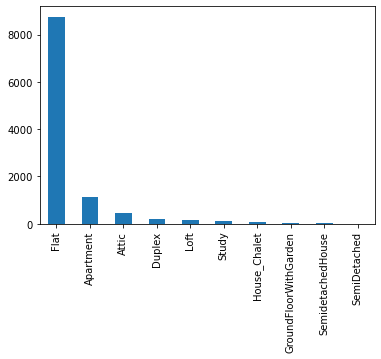

In [15]:
df['building_subtype'].value_counts().plot(kind='bar')

##### conservation_state
There are 6 different conservation states in Fotocasa classification. We properly re-encode them as they are displayed on their website. Most of the homes are new constructions, surprisingly.

In [16]:
df['conservation_state'].value_counts()

0    5991
1    1859
2    1554
3    1449
8      59
4      16
Name: conservation_state, dtype: int64

In [18]:
df['conservation_state'] = df['conservation_state'].replace({
    0: 'New construction', 
    1: 'Nearly new', 
    2: 'Very good', 
    3: 'Good', 
    4: 'To renovate', 
    8: 'Renovated'
  })
df['conservation_state'].value_counts()

New construction    5991
Nearly new          1859
Very good           1554
Good                1449
Renovated             59
To renovate           16
Name: conservation_state, dtype: int64

<AxesSubplot:>

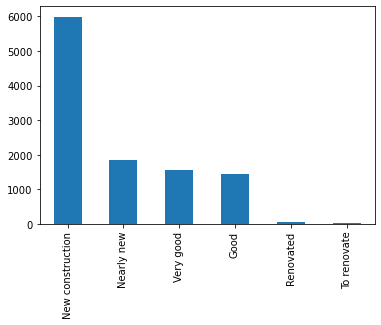

In [19]:
df['conservation_state'].value_counts().plot(kind='bar')

##### floor_elevator
Most of the homes have an elevator.

In [20]:
df['floor_elevator'].value_counts()

True     7858
False    3070
Name: floor_elevator, dtype: int64

<AxesSubplot:>

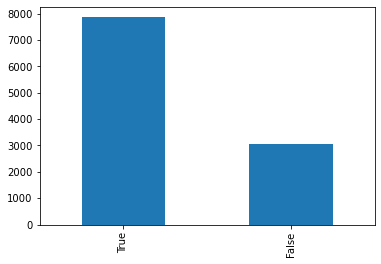

In [21]:
df['floor_elevator'].value_counts()[:10].plot(kind='bar')

##### is_new_construction
Almost no house is newly constructed according to this variable. This contradicts what the variable 'conservation_state' indicates.

In [92]:
df['is_new_construction'].value_counts()

False    10836
True        92
Name: is_new_construction, dtype: int64

<AxesSubplot:>

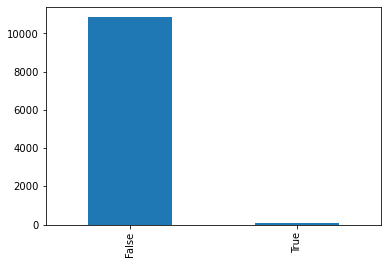

In [22]:
df['is_new_construction'].value_counts()[:10].plot(kind='bar')

##### real_estate
There are 1116 different real_estate agencies. Some of them concentrate most of the homes. There are some missing ones with respect to real_estate_id (see next section).

In [93]:
len(df['real_estate'].unique())

1116

In [24]:
len(df['real_estate_id'].unique())

1317

In [94]:
df['real_estate'].value_counts()[:10]

ENGEL & VOELKERS                         832
APROPERTIES REAL ESTATE Nº Aicat 6388    509
SH BARCELONA                             472
AREA CASA                                337
Homelike                                 325
ALL4FLAT                                 206
MONIKA RÜSCH                             179
NaN                                      172
PUNTO HABITAT                            163
DOMINGUEZ                                148
Name: real_estate, dtype: int64

In [95]:
sum(df['real_estate'] == 'NaN')

172

<AxesSubplot:>

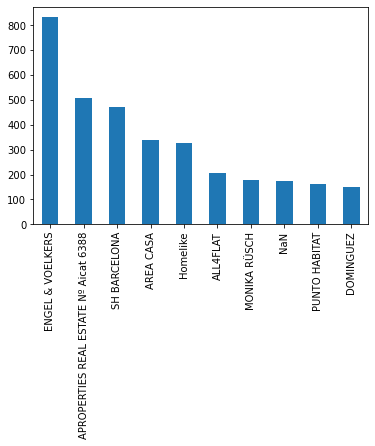

In [23]:
df['real_estate'].value_counts()[:10].plot(kind='bar')

##### neighbourhood
The database contains homes in 67 out of the 73  neighboourhoods of Barcelona. 2 rows do not have a neighbourhood set.

In [96]:
len(df['neighbourhood'].unique().tolist())

67

In [97]:
sum(df['neighbourhood'] == 'NaN')

2

<AxesSubplot:>

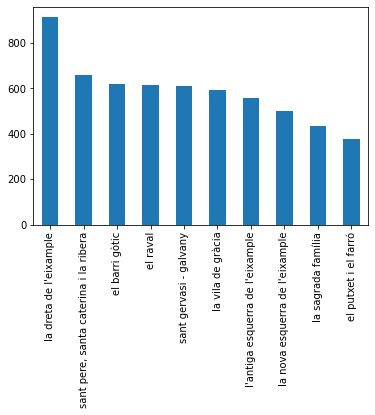

In [25]:
df['neighbourhood'].value_counts()[:10].plot(kind='bar')

### Remove duplicates

There is an important amount of duplicates (more than a thousand). We remove them.

In [98]:
sum(df.iloc[:, 1:].duplicated())

1183

In [99]:
df = df[-df.iloc[:, 1:].duplicated()]
len(df)

9745

### Check missing values

##### Count missing values

In [100]:
df = df.replace('NaN', np.nan, regex=True)
df.isna().sum()

id                            0
address                       0
bathrooms                     0
building_subtype              0
conservation_state            0
discount                      0
floor_elevator                0
is_new_construction           0
price                         4
real_estate                 172
real_estate_id                0
rooms                         0
sq_meters                     0
neighbourhood                 2
neighbourhood_mean_price      2
dtype: int64

##### Manually correct 2 missings in neighbourhood and neighbourhood_mean_price

In [101]:
df[df['neighbourhood'].isna()]

,id,address,bathrooms,building_subtype,conservation_state,discount,floor_elevator,is_new_construction,price,real_estate,real_estate_id,rooms,sq_meters,neighbourhood,neighbourhood_mean_price
970,968,"Avenida Meridiana, 256, Sant Andreu",1,Flat,New construction,0,True,True,1443.0,NUÑEZ I NAVARRO,9202756861499,2,69.0,NaN,NaN
9381,9380,Zona Franca - Port,1,Study,Very good,0,True,False,550.0,LORDA ADMINSTRACION FINCAS,9202753020505,1,23.0,NaN,NaN


In [102]:
df.loc[df['id'] == 968, 'neighbourhood'] = 'sant andreu'
df.loc[df['id'] == 9380, 'neighbourhood'] = 'la marina de port'

In [103]:
df.loc[df['id'] == 968, 'neighbourhood_mean_price'] = df[df['neighbourhood'] == 'sant andreu']['neighbourhood_mean_price'].mean()
df.loc[df['id'] == 9380, 'neighbourhood_mean_price'] = df[df['neighbourhood'] == 'la marina de port']['neighbourhood_mean_price'].mean()

##### Remove 4 rows with missing price (since it is the target)

In [104]:
df = df[-df['price'].isna()]

##### Check missings in real_estate

We observe that there are no missing real_estate_ids but there are some missing real_estate names.
Each real_estate_id corresponds to a single real_estate name (so it seems that there are no typos).

Therefore, from now on, we will use real_estate names as a complementary information (may be useful in plots, for example) but in the modelling phase only real_estate_id will be indicated for use.

In [105]:
l = df.groupby('real_estate_id')['real_estate'].nunique()
print(min(l), max(l))

0 1


We are now left with missing values only in real_estate, as explained above.

In [106]:
df.isna().sum()

id                            0
address                       0
bathrooms                     0
building_subtype              0
conservation_state            0
discount                      0
floor_elevator                0
is_new_construction           0
price                         0
real_estate                 171
real_estate_id                0
rooms                         0
sq_meters                     0
neighbourhood                 0
neighbourhood_mean_price      0
dtype: int64